In [10]:
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [21]:
train_dir = './dataset/train/'
train_data = image_dataset_from_directory(train_dir,
                                          seed=42,
                                          batch_size=32,
                                          label_mode='categorical',
                                          image_size=(224,224))

Found 1248 files belonging to 26 classes.


In [13]:
def create_model():
    
    
    data_augmentation = Sequential([
        layers.RandomFlip('horizontal'),
        layers.RandomRotation(0.2),
        layers.RandomHeight(0.2),
        layers.RandomWidth(0.2),
        layers.RandomZoom(0.2)
    ],name='data_augmentation')
    
    
    base_model = tf.keras.applications.EfficientNetB0(include_top=False)
    base_model.trainable = True
    
    for layer in base_model.layers[:-20]:
        layer.trainable = False
        
    inputs = layers.Input(shape=(224,224,3),name="Input Layer")
    z = data_augmentation(inputs)
    z = base_model(z,training=False)
    z = layers.GlobalAveragePooling2D()(z)
    outputs = layers.Dense(26,activation="softmax",name="output")(z)
    model = tf.keras.Model(inputs,outputs)
    return model

In [14]:
model = create_model()

In [15]:
model.load_weights('weights/')

In [16]:
def load_and_prep_img(filename , img_shape=224):
    
    
    from tensorflow.keras.utils import load_img ,img_to_array
    import numpy as np
    import matplotlib.pyplot as plt
    
    """
    Reads an image from filename, turns it into a tensor and reshapes it to 
    (img_shape,img_shape,colour channels)
    
    """
    
    test_img = load_img(filename,target_size=(img_shape,img_shape))
    test_img = img_to_array(test_img)
    
    return test_img

In [17]:
def pred_and_plot(model,filename, train_data):
    import matplotlib.pyplot as plt
    img = load_and_prep_img(filename)
    
    pred = model.predict(tf.expand_dims(img,axis=0))
    
    if(len(pred[0]) > 1):
        pred_class = train_data.class_names[tf.argmax(pred[0])]
    else:
        pred_class = train_data.class_names[int(tf.round(pred[0]))]
        
    
    
    
    plt.imshow(img.astype('uint8'))
    plt.title(f"Prediction: {pred_class}")
    return pred_class

1/1 [==============================] - 0s 15ms/step


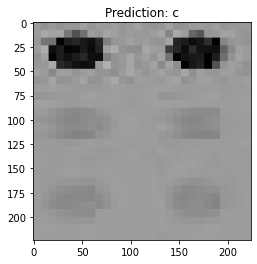

In [24]:
class_name = pred_and_plot(model,'./dataset/test/c/c1.JPG0dim.jpg',train_data)

In [37]:
import pyttsx3
engine = pyttsx3.init()
rate = engine.getProperty('rate')   # getting details of current speaking rate
print (rate)                        #printing current voice rate
engine.setProperty('rate', 1)     # setting up new voice rate
engine.say(f"The predicted Braille is Alphabet {class_name}")
engine.runAndWait()


500


error
